In [26]:
#Import initial dependencies

import pandas as pd
import pyodbc 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Establish connection to SQL database

conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=tcp:group1-owner-nu.database.windows.net,1433;'
                      'Database=final-project;'
                      'Persist Security Info=False;'
                      'Uid=GROUPDB1NU;'
                      'Pwd=NU02282021!;'
                      'MultipleActiveResultSets=False;'
                      'Encrypt=Yes;'
                      'TrustServerCertificate=No;'
                      'Connection Timeout=30;')


cursor = conn.cursor()

#Read tables from SQL

vintagetable = pd.read_sql("SELECT * FROM dbo.vintage", conn)
winetable = pd.read_sql("SELECT * FROM dbo.wine", conn)

#Generate dataframes from SQL tables
vintage_df=pd.DataFrame(vintagetable)
wine_df=pd.DataFrame(winetable)

In [27]:
#Merge tables on primary key FullName column

full_table = pd.merge(vintage_df, wine_df, on='FullName', how='inner')
full_table.head()

,FullName,Winery_x,WineName_x,Year_x,Region_x,RegionalVariety_x,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,Winery_y,WineName_y,Year_y,Region_y,RegionalVariety_y,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,A. Christmann,Idig GG,2012,German,Riesling,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,A. Christmann,Idig GG,2014,German,Riesling,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,A. Christmann,Idig GG,2015,German,Riesling,4.3,869,57.55,0.074718
3,Abadal Nuat 2015,Abadal,Nuat,2015,None,None,4.1,29,31.99,0.128165,6,Abadal,Nuat,2015,None,None,3.9,253,31.99,0.121913
4,Abadia Retuerta Le Domaine Blanco de Guarda 2015,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,0.141379,6,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.2,1424,29.00,0.144828


In [28]:
full_table['Year_x'] = full_table['Year_x'].replace(['N.V.'],'')
full_table.dropna(axis=0)

,FullName,Winery_x,WineName_x,Year_x,Region_x,RegionalVariety_x,VintageRating,VintageRatingCount,VintagePrice,VintageRatingPriceRatio,Age,Winery_y,WineName_y,Year_y,Region_y,RegionalVariety_y,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann Idig GG 2012,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,0.051221,9,A. Christmann,Idig GG,2012,German,Riesling,4.3,869,83.95,0.051221
1,A. Christmann Idig GG 2014,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,0.052598,7,A. Christmann,Idig GG,2014,German,Riesling,4.3,869,77.95,0.055164
2,A. Christmann Idig GG 2015,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,0.074718,6,A. Christmann,Idig GG,2015,German,Riesling,4.3,869,57.55,0.074718
15,Abel Mendoza Monge 5V Blanco 2017,Abel Mendoza Monge,5V Blanco,2017,Spanish,Rioja White,4.0,53,35.10,0.113960,4,Abel Mendoza Monge,5V Blanco,2017,Spanish,Rioja White,4.0,249,35.10,0.113960
16,Abel Mendoza Monge Viura 2017,Abel Mendoza Monge,Viura,2017,Spanish,Rioja White,4.2,49,26.00,0.161538,4,Abel Mendoza Monge,Viura,2017,Spanish,Rioja White,4.0,516,26.00,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,Zidarich Vitovska Collection 2009,Zidarich,Vitovska Collection,2009,Northern Italy,White,4.1,38,67.13,0.061076,12,Zidarich,Vitovska Collection,2009,Northern Italy,White,4.0,131,67.13,0.059586
4589,Zidarich Vitovska Kamen 2016,Zidarich,Vitovska Kamen,2016,Northern Italy,White,4.1,53,39.07,0.104940,5,Zidarich,Vitovska Kamen,2016,Northern Italy,White,4.0,190,39.07,0.102380
4590,Zuccardi Fósil San Pablo 2018,Zuccardi,Fósil San Pablo,2018,Argentinian,Chardonnay,4.2,95,65.80,0.063830,3,Zuccardi,Fósil San Pablo,2018,Argentinian,Chardonnay,4.2,417,65.80,0.063830
4591,Κτημα Τσελεπου (Estate Tselepos) Canava Chriss...,Κτημα Τσελεπου (Estate Tselepos),Canava Chrissou Tselepos Santorini Vieilles Vi...,2014,Greek Santorini,White,4.0,51,30.68,0.130378,7,Κτημα Τσελεπου (Estate Tselepos),Canava Chrissou Tselepos Santorini Vieilles Vi...,2014,Greek Santorini,White,4.0,559,30.68,0.130378


In [29]:
# Drop the non-beneficial ID columns

clean_table = full_table.drop(["Winery_y", "WineName_y", "Year_y", "Region_y", "RegionalVariety_y", "VintageRatingPriceRatio", "FullName", "Age"],1)
clean_table.head()

,Winery_x,WineName_x,Year_x,Region_x,RegionalVariety_x,VintageRating,VintageRatingCount,VintagePrice,WineRating,WineRatingCount,WinePrice,WineRatingPriceRatio
0,A. Christmann,Idig GG,2012,German,Riesling,4.3,106,83.95,4.3,869,83.95,0.051221
1,A. Christmann,Idig GG,2014,German,Riesling,4.1,95,77.95,4.3,869,77.95,0.055164
2,A. Christmann,Idig GG,2015,German,Riesling,4.3,105,57.55,4.3,869,57.55,0.074718
3,Abadal,Nuat,2015,None,None,4.1,29,31.99,3.9,253,31.99,0.121913
4,Abadia Retuerta,Le Domaine Blanco de Guarda,2015,None,None,4.1,149,29.00,4.2,1424,29.00,0.144828


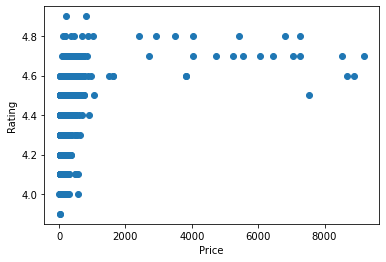

In [31]:
plt.scatter(clean_table.VintagePrice, clean_table.VintageRating)
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

In [33]:
X = clean_table.VintagePrice.values.reshape(-1, 1)
y = clean_table.VintageRating

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)
print(y_pred.shape)

(4593,)


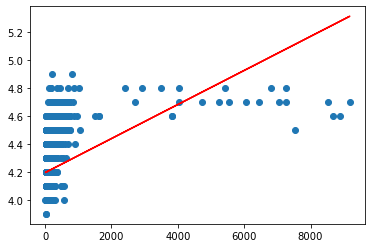

In [34]:
#Plot the

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [35]:
print(model.coef_)
print(model.intercept_)

[0.00012203]
4.195617120288046
